## Ridge Regression with Clustering - key stats

In [18]:
#import all packages
%matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using matplotlib backend: MacOSX


In [19]:
# import the dataset, n = 6934
df = pd.read_csv("key_stats_yahoo.csv")
x = df.drop(df.columns[[0,3,33]], axis=1)

In [20]:
# normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.shape

(6934, 31)

In [21]:
# X and Y
Y = X_scaled[29]
X = X_scaled.drop([29], axis = 1)

In [22]:
# split data into three clusters 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
clusters = kmeans.predict(X)
clusters
type(X)

pandas.core.frame.DataFrame

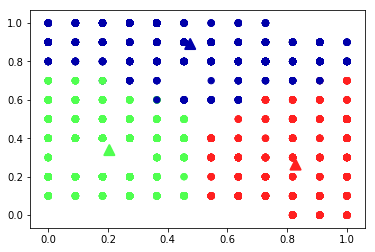

In [23]:
# plotting the clusters
import mglearn
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap=mglearn.cm3, s=40)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', s=100, linewidth=2, c=[0, 1, 2], cmap=mglearn.cm3)

In [24]:
# adding the clusters to the df
X['31'] = clusters
X['32'] = Y
# creating new data frames
df1 = X[X.iloc[:,30]==0]
df2 = X[X.iloc[:,30]==1]
df3 = X[X.iloc[:,30]==2]

In [25]:
# cluster 1
Y1 = df1['32']
X1 = df1.drop(['31', '32'], axis=1)
print(X1.shape)
Y1.shape

(2621, 30)


(2621,)

In [26]:
# cluster 2
Y2 = df2['32']
X2 = df2.drop(['31', '32'], axis=1)
print(X2.shape)
Y2.shape

(1761, 30)


(1761,)

In [27]:
# cluster 3
Y3 = df3['32']
X3 = df3.drop(['31', '32'], axis=1)
print(X3.shape)
Y3.shape

(2552, 30)


(2552,)

## --------------------

In [28]:
# feature selection for the first cluster
# correlation coefficient matrix
corr = X1.corr()
corr

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,30
0,1.000000,-0.466777,0.019227,-0.003894,-0.023080,-0.013492,-0.025048,-0.008603,-0.000028,0.039425,...,-0.017848,-0.024114,-0.011330,0.070718,-0.014646,-0.037378,-0.010242,0.033039,-0.007761,0.007149
1,-0.466777,1.000000,-0.015954,0.078907,0.040492,0.067053,0.022125,0.004618,-0.011511,-0.045487,...,-0.085428,0.018272,-0.022815,-0.130957,-0.014143,0.028583,-0.013424,0.022265,0.017577,-0.052246
2,0.019227,-0.015954,1.000000,-0.051411,-0.020962,-0.009404,-0.013278,-0.008391,0.000072,0.008703,...,-0.029808,-0.073050,-0.031327,-0.022309,-0.020295,-0.039423,-0.028268,-0.013200,-0.062847,-0.016840
3,-0.003894,0.078907,-0.051411,1.000000,-0.019565,-0.104033,0.184541,-0.104832,-0.076326,-0.173325,...,-0.020204,-0.085198,-0.018766,-0.073081,0.121907,-0.038022,0.306264,0.090457,-0.212882,0.025079
4,-0.023080,0.040492,-0.020962,-0.019565,1.000000,0.264181,0.010480,-0.131640,-0.074050,-0.141479,...,-0.108123,-0.173769,0.042738,0.097686,-0.065136,-0.025887,-0.036271,-0.002791,-0.067193,-0.001423
5,-0.013492,0.067053,-0.009404,-0.104033,0.264181,1.000000,0.041755,0.523817,0.584067,0.127858,...,-0.080165,0.016860,0.028951,0.200277,-0.034035,0.022760,-0.074300,0.040199,0.044643,-0.064318
6,-0.025048,0.022125,-0.013278,0.184541,0.010480,0.041755,1.000000,0.014143,0.034237,0.118929,...,-0.004156,0.023556,-0.016909,-0.021989,-0.022804,-0.007609,-0.012081,-0.009587,-0.086667,-0.024066
7,-0.008603,0.004618,-0.008391,-0.104832,-0.131640,0.523817,0.014143,1.000000,0.645768,0.198856,...,0.095351,0.244961,0.048595,0.054202,0.081318,0.044008,-0.037281,0.026837,0.104397,0.003511
8,-0.000028,-0.011511,0.000072,-0.076326,-0.074050,0.584067,0.034237,0.645768,1.000000,0.351896,...,0.047593,0.224355,-0.040227,0.054521,0.055859,0.038693,-0.055839,0.009892,0.198953,-0.059442
9,0.039425,-0.045487,0.008703,-0.173325,-0.141479,0.127858,0.118929,0.198856,0.351896,1.000000,...,0.162750,0.316488,-0.151807,-0.019402,-0.029060,-0.011979,-0.162604,-0.040554,-0.143799,-0.103708


In [29]:
# adding a column for x0
x0 = np.ones((len(X1),1))
X1 = np.hstack((x0, X1))
X1.shape

(2621, 31)

In [30]:
# backward feature selection
import statsmodels.formula.api as sm
numVars = len(X1[0]) 
rs = []
numofatt = []
# names of the features
names = ['x0','Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common','Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Book Value per Share', 'Beta']

for i in range(0, numVars):
    regressor_OLS = sm.OLS(Y1, X1).fit() #fitting OLS model
    regressor_OLS.summary(xname = names)
    maxp = max(regressor_OLS.pvalues) # find max p-value
    rs.append(regressor_OLS.rsquared) # make list of R2 values
    numofatt.append(len(X1[0])) # make list of num of attributes
    for j in range(0, numVars - i):
        if (regressor_OLS.pvalues[j] == maxp):
            names.remove(names[j])
            X1 = np.delete(X1, j, 1)
            print(names)

print(rs)
print(numofatt)

['x0', 'Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Book Value per Share', 'Beta']
['x0', 'Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Book Value per Share', 'Beta']
['x0', 'Month', 'Year', 'Pric

In [31]:
# finding the optimal number of attributes based on the maximum R-squared value
best_equation = np.column_stack((rs,numofatt))
print(best_equation)
# find the maximum r-squared
m = np.argmax(best_equation[:,0])
num = best_equation[m,1]
print('The ideal number of features is:', num)

[[  0.43492739  31.        ]
 [  0.4349273   30.        ]
 [  0.43492669  29.        ]
 [  0.43492551  28.        ]
 [  0.43492291  27.        ]
 [  0.43491918  26.        ]
 [  0.43491031  25.        ]
 [  0.43489981  24.        ]
 [  0.43488539  23.        ]
 [  0.43487254  22.        ]
 [  0.43485583  21.        ]
 [  0.43483343  20.        ]
 [  0.43479963  19.        ]
 [  0.43476255  18.        ]
 [  0.4346563   17.        ]
 [  0.43451066  16.        ]
 [  0.43429188  15.        ]
 [  0.43411414  14.        ]
 [  0.43390224  13.        ]
 [  0.43353707  12.        ]
 [  0.43314598  11.        ]
 [  0.43247231  10.        ]
 [  0.43158089   9.        ]
 [  0.43127851   8.        ]
 [  0.42961936   7.        ]
 [  0.42682645   6.        ]
 [  0.4132227    5.        ]
 [  0.39566515   4.        ]
 [  0.34264765   3.        ]
 [  0.42129093   2.        ]
 [  0.34071325   1.        ]]
The ideal number of features is: 31.0


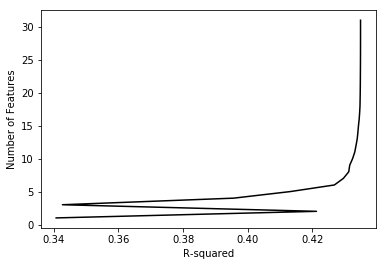

In [32]:
## graph the feature selection
x = rs
y = numofatt
plt.plot(x,y, 'k-')
plt.ylabel('Number of Features')
plt.xlabel('R-squared')

In [33]:
# remaking cluster 1 with all of the attributes
Y1 = df1['32']
X1 = df1.drop(['31', '32'], axis=1)
Y1.shape
Y1 = np.array(Y1)
X1 = np.array(X1)
# adding a column for x0
x0 = np.ones((len(X1),1))
X1 = np.hstack((x0, X1))
X1.shape

(2621, 31)

In [34]:
# ridge regression function, outputs the MSE
def ridgeregression(xtrain, ytrain, xtest, ytest, a):
    xtrain = np.matrix(xtrain)
    ytrain = np.matrix(ytrain)
    xtest = np.matrix(xtest)
    ytest = np.matrix(ytest)
    n = len(xtrain.T*xtrain)
    I = np.identity(n)
    what = (np.linalg.inv(xtrain.T*xtrain + a*I))*(xtrain.T*ytrain.T)
    
    # calculating the yhat values 
    yhat = xtest*what
    
    # calculating MSE value
    mse = np.sum(np.square(ytest.T-yhat))/len(yhat)
    return(mse)

In [35]:
### CV - lambda on logarithmic scale
# grid search 1
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42) # 10 folds
kf
scores = []
for a in [10**a for a in range(-4,3)]: # user specified range
    for train_index, test_index in kf.split(X1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = Y1[train_index], Y1[test_index]
        score = ridgeregression(X_train, y_train, X_test, y_test, a) # calling the ridge regression function
    print(score.mean(), a)
    scores.append(score.mean()) 
    
    
# finding the best lambda
alphas = []
for a in [10**a for a in range(-4,3)]: # must match range above
    alphas.append(a)
alphas = np.asarray(alphas)
# creating a table of the mse values and the lambda values 
best_alpha = np.column_stack((scores,alphas))
best_alpha
# find the minimum mse
m = np.argmin(best_alpha[:,0])
alpha = best_alpha[m,1]
print('The best lambda value is:', alpha)

0.00925681154021 0.0001
0.00925673295064 0.001
0.009273962202 0.01
0.00934288583284 0.1
0.00956623605442 1
0.00923154429761 10
0.00955410300483 100
The best lambda value is: 10.0


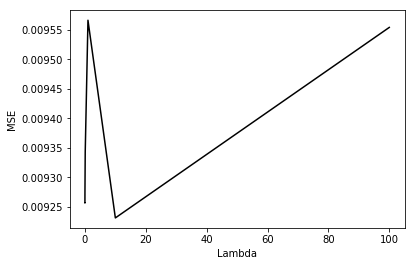

In [36]:
# plotting grid search 1
x = alphas
y = scores
plt.plot(x,y, 'k-')
plt.ylabel('MSE')
plt.xlabel('Lambda')

In [37]:
### CV - lambda from 1 to 100
# grid search 2
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
for a in range(1,100): # user specified range
    for train_index, test_index in kf.split(X1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = Y1[train_index], Y1[test_index]
        score = ridgeregression(X_train, y_train, X_test, y_test, a)
    print(score.mean(), a)
    scores.append(score.mean()) 
    
    
# finding the best lambda
alphas = []
for a in range(1,100): # range must match above
    alphas.append(a)
alphas = np.asarray(alphas)
# creating a table of the mse values and the lambda values 
best_alpha = np.column_stack((scores,alphas))
best_alpha
# find the minimum mse
m = np.argmin(best_alpha[:,0])
alpha = best_alpha[m,1]
print('The best lambda value is:', alpha)

0.00956623605442 1
0.0096215602225 2
0.00960460385368 3
0.00955932014959 4
0.00950338479555 5
0.00944466055146 6
0.00938682042265 7
0.00933159002869 8
0.00927973764994 9
0.00923154429761 10
0.00918703916864 11
0.00914612231316 12
0.00910863032938 13
0.00907437213541 14
0.00904314853871 15
0.00901476282792 16
0.0089890263099 17
0.00896576097583 18
0.00894480053643 19
0.00892599054126 20
0.00890918799829 21
0.00889426073746 22
0.00888108666016 23
0.00886955295675 24
0.00885955533846 25
0.00885099730815 26
0.00884378948211 27
0.00883784896722 28
0.00883309879352 29
0.00882946739992 30
0.00882688816935 31
0.00882529900947 32
0.00882464197442 33
0.00882486292388 34
0.00882591121528 35
0.00882773942592 36
0.00883030310161 37
0.0088335605291 38
0.00883747252969 39
0.00884200227171 40
0.00884711510001 41
0.00885277838045 42
0.00885896135808 43
0.00886563502732 44
0.00887277201322 45
0.00888034646243 46
0.00888833394312 47
0.00889671135283 48
0.0089054568336 49
0.00891454969367 50
0.00892397033

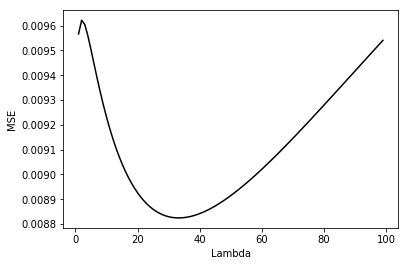

In [38]:
# plotting grid search 2
x = alphas
y = scores
plt.plot(x,y, 'k-')
plt.ylabel('MSE')
plt.xlabel('Lambda')

In [39]:
### CV - lambda from 25 to 40
# grid search 3
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
for a in range(25,40): # user specified range
    for train_index, test_index in kf.split(X1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = Y1[train_index], Y1[test_index]
        score = ridgeregression(X_train, y_train, X_test, y_test, a)
    print(score.mean(), a)
    scores.append(score.mean()) 
    
    
# finding the best lambda
alphas = []
for a in range(25,40): # range must match above
    alphas.append(a)
alphas = np.asarray(alphas)
# creating a table of the mse values and the lambda values 
best_alpha = np.column_stack((scores,alphas))
best_alpha
# find the minimum mse
m = np.argmin(best_alpha[:,0])
alpha = best_alpha[m,1]
print('The best lambda value is:', alpha)

0.00885955533846 25
0.00885099730815 26
0.00884378948211 27
0.00883784896722 28
0.00883309879352 29
0.00882946739992 30
0.00882688816935 31
0.00882529900947 32
0.00882464197442 33
0.00882486292388 34
0.00882591121528 35
0.00882773942592 36
0.00883030310161 37
0.0088335605291 38
0.00883747252969 39
The best lambda value is: 33.0


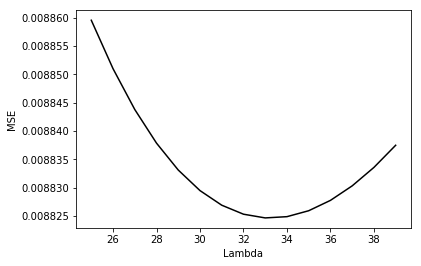

In [40]:
# plotting grid search 3
x = alphas
y = scores
plt.plot(x,y, 'k-')
plt.ylabel('MSE')
plt.xlabel('Lambda')

In [44]:
# creating the Ridge Regression Model
# returns what and yhat, used for plots later
def ridgereg(xtrain, ytrain, xtest, ytest, a):
    xtrain = np.matrix(xtrain)
    ytrain = np.matrix(ytrain)
    xtest = np.matrix(xtest)
    ytest = np.matrix(ytest)
    n = len(xtrain.T*xtrain)
    I = np.identity(n)
    what = (np.linalg.inv(xtrain.T*xtrain + a*I))*(xtrain.T*ytrain.T)
    
    # calculating the yhat values 
    yhat = xtest*what
    
    # calculating MSE value
    mse = np.sum(np.square(ytest.T-yhat))/len(yhat)
    return((what,yhat))

In [46]:
# optimal lambda - 33
## to find the weights 
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
for a in range(33,34):
    for train_index, test_index in kf.split(X1):
        X_train, X_test = X1[train_index], X1[test_index]
        y_train, y_test = Y1[train_index], Y1[test_index]
        score = ridgereg(X_train, y_train, X_test, y_test, a)[0]
        scores.append(score[30]) # need to index from 0 to 30
            
    scores = np.array(scores)
print(scores.mean())

-0.000435925223015


In [49]:
res = ridgereg(X_train, y_train, X_test, y_test, 33)
(res[1].T).shape

(1, 262)

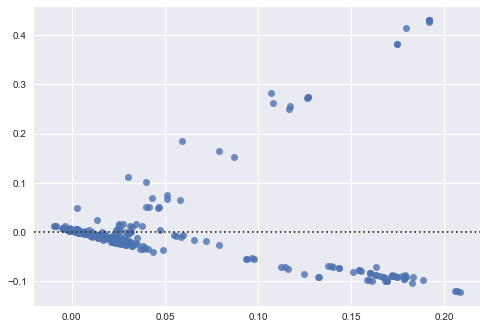

In [51]:
# residual plot
x = np.array(res[1])
y = y_test
import seaborn
seaborn.residplot(x, y)

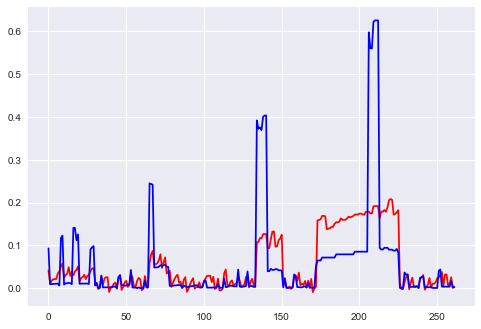

In [52]:
# plotting actual vs predicted values of y
x = np.array(res[1])
y = y_test

t = range(len(y_test))

plt.plot(t, x, 'r') # plotting t, a separately 
plt.plot(t, y, 'b') # plotting t, b separately 

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d25fb70>]], dtype=object)

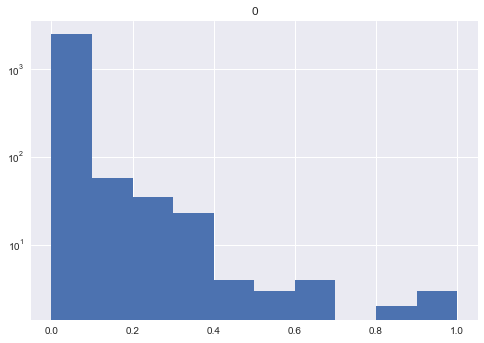

In [53]:
# histogram of Y
pd.DataFrame(Y1).hist(log=True)

In [54]:
## Lasso 

In [55]:
# remaking data frame 1 with all of the attributes
Y1 = df1['32']
X1 = df1.drop(['31', '32'], axis=1)
Y1.shape
Y1 = np.array(Y1)
X1 = np.array(X1)
# adding a column for x0
x0 = np.ones((len(X1),1))
X1 = np.hstack((x0, X1))
X1.shape

(2621, 31)

In [56]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, random_state = 42)

In [57]:
### Lasso Regression
# grid search 1
from sklearn.linear_model import LassoCV, Lasso
from sklearn import linear_model
lasso = linear_model.LassoCV(alphas = [.0001,.001,.01,.1,1,10,100], cv=10) #setting cross-validation to 10
lasso.fit(X1_train, y1_train)
print(lasso.alpha_)
print(lasso.mse_path_)

0.0001
[[ 0.00845613  0.00147022  0.00330366  0.00258663  0.01266776  0.00130908
   0.00315783  0.00577254  0.0082908   0.00543857]
 [ 0.00845613  0.00147022  0.00330366  0.00258663  0.01266776  0.00130908
   0.00315783  0.00577254  0.0082908   0.00543857]
 [ 0.00845613  0.00147022  0.00330366  0.00258663  0.01266776  0.00130908
   0.00315783  0.00577254  0.0082908   0.00543857]
 [ 0.00845613  0.00147022  0.00330366  0.00258663  0.01266776  0.00130908
   0.00315783  0.00577254  0.0082908   0.00543857]
 [ 0.00845613  0.00147022  0.00330366  0.00258663  0.01266776  0.00130908
   0.00315783  0.00577254  0.0082908   0.00543857]
 [ 0.00561308  0.00118848  0.00218226  0.00180929  0.00873065  0.0011742
   0.00216258  0.00373421  0.00534163  0.00369549]
 [ 0.00489878  0.00128054  0.00201708  0.00200341  0.00748446  0.00152687
   0.00210564  0.00349559  0.00462223  0.00366278]]


In [58]:
# grid search 2
lasso = linear_model.LassoCV(alphas = [.0001,.0002,.0003], cv=10) #setting cross-validation to 10
lasso.fit(X1_train, y1_train)
print(lasso.alpha_)
lasso.mse_path_

0.0001


array([[ 0.00520905,  0.00126597,  0.00206692,  0.00180621,  0.00803529,
         0.00135804,  0.00220232,  0.00343931,  0.00493133,  0.00380405],
       [ 0.00514008,  0.00127454,  0.0020449 ,  0.00189991,  0.00775169,
         0.00144187,  0.00223951,  0.00346142,  0.0047938 ,  0.00384922],
       [ 0.00489879,  0.00128054,  0.00201708,  0.00200342,  0.00748447,
         0.00152687,  0.00210564,  0.0034956 ,  0.00462223,  0.00366277]])

In [61]:
# calculating the MSE
lst = [ 0.00520905,  0.00126597,  0.00206692,  0.00180621,  0.00803529,
         0.00135804,  0.00220232,  0.00343931,  0.00493133,  0.00380405]
np.average(lst)

0.0034118490000000002

In [62]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X1_train, y1_train)
print(np.sum(lasso0001.coef_ != 0))
print(lasso0001.coef_ != 0)
print(lasso0001.coef_ )

9
[False  True  True False  True False False False False  True False False
 False  True False False False False False False False  True False False
 False  True False  True  True False False]
[ 0.          0.0346756  -0.11505914 -0.          0.00194031  0.          0.
 -0.          0.          0.02783985  0.          0.         -0.
  0.05531963  0.         -0.          0.          0.          0.          0.
  0.          0.18495366 -0.          0.          0.          0.02878664
 -0.          0.24921614 -0.14804421 -0.         -0.        ]


## ----------------------

In [63]:
# feature selection for the second cluster
# correlation coefficient matrix 
corr = X2.corr()
corr

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,30
0,1.000000,0.172476,0.021870,0.068016,-0.041595,-0.070265,-0.034174,0.012302,0.006880,-0.026322,...,0.043656,0.060367,0.016158,0.019170,-0.036407,-0.020623,0.033276,-0.024625,0.053365,0.019262
1,0.172476,1.000000,0.049619,0.115852,-0.127244,-0.114748,-0.036761,0.103237,0.095884,0.034673,...,0.169495,0.221613,-0.105078,0.040180,0.098438,-0.039566,0.093522,0.005003,0.111873,0.091248
2,0.021870,0.049619,1.000000,-0.010611,-0.003762,0.004284,-0.014500,-0.005448,-0.017668,-0.024206,...,-0.019164,-0.059934,-0.023491,-0.009117,0.012286,-0.004548,-0.012897,-0.007514,-0.036306,0.005788
3,0.068016,0.115852,-0.010611,1.000000,-0.011266,-0.028019,0.575979,-0.029501,-0.015564,-0.012498,...,-0.027671,-0.018829,0.043531,-0.014614,-0.007469,0.002087,0.017609,-0.008904,-0.024559,-0.009382
4,-0.041595,-0.127244,-0.003762,-0.011266,1.000000,0.274991,0.048880,-0.122549,-0.106941,-0.148418,...,-0.119968,-0.256219,0.014980,0.112050,-0.066068,-0.007310,-0.045439,0.061822,-0.093723,0.021895
5,-0.070265,-0.114748,0.004284,-0.028019,0.274991,1.000000,0.120139,0.429155,0.437136,0.186057,...,-0.074110,-0.183431,0.057295,0.329486,0.027919,-0.020922,-0.068144,0.276029,-0.088421,0.017682
6,-0.034174,-0.036761,-0.014500,0.575979,0.048880,0.120139,1.000000,0.004723,0.027513,0.232735,...,-0.046904,-0.056818,-0.018333,0.016347,-0.042336,-0.003716,-0.036228,-0.019185,-0.141203,0.012825
7,0.012302,0.103237,-0.005448,-0.029501,-0.122549,0.429155,0.004723,1.000000,0.790440,0.361745,...,0.111548,0.316912,0.079755,0.171815,0.123780,-0.026171,-0.022002,0.168415,0.072224,0.017415
8,0.006880,0.095884,-0.017668,-0.015564,-0.106941,0.437136,0.027513,0.790440,1.000000,0.463286,...,0.128987,0.240640,0.039699,0.180110,0.098656,-0.015616,-0.023396,0.101631,0.087789,0.032793
9,-0.026322,0.034673,-0.024206,-0.012498,-0.148418,0.186057,0.232735,0.361745,0.463286,1.000000,...,0.185465,0.133692,-0.062223,0.064065,0.024716,-0.040773,-0.139961,0.043752,-0.184610,0.075276


In [64]:
# adding a column for x0
x0 = np.ones((len(X2),1))
X2 = np.hstack((x0, X2))
X2.shape

(1761, 31)

In [65]:
# backward feature selection
import statsmodels.formula.api as sm
numVars = len(X2[0]) 
rs = []
numofatt = []
# feature names
names = ['x0','Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common','Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Book Value per Share', 'Beta']

for i in range(0, numVars):
    regressor_OLS = sm.OLS(Y2, X2).fit()
    regressor_OLS.summary(xname = names)
    maxp = max(regressor_OLS.pvalues) # find max p-value
    rs.append(regressor_OLS.rsquared) # make list of R2 values
    numofatt.append(len(X2[0])) # make list of num of attributes
    for j in range(0, numVars - i):
        if (regressor_OLS.pvalues[j] == maxp):
            names.remove(names[j])
            X2 = np.delete(X2, j, 1)
            print(names)

print(rs)
print(numofatt)

31
['x0', 'Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Book Value per Share', 'Beta']
['x0', 'Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Book Value per Share', 'Beta']
['x0', 'Month', 'Year'

In [66]:
# finding the optimal number of attributes based on the maximum R-squared value
best_equation = np.column_stack((rs,numofatt))
print(best_equation)
# find the maximum r-squared
m = np.argmax(best_equation[:,0])
num = best_equation[m,1]
print('The ideal number of features is:', num)

[[  0.90912     31.        ]
 [  0.90911994  30.        ]
 [  0.90911972  29.        ]
 [  0.90911765  28.        ]
 [  0.90911259  27.        ]
 [  0.90910509  26.        ]
 [  0.90909713  25.        ]
 [  0.90908791  24.        ]
 [  0.90907253  23.        ]
 [  0.90905619  22.        ]
 [  0.90903735  21.        ]
 [  0.90900751  20.        ]
 [  0.90897377  19.        ]
 [  0.90892977  18.        ]
 [  0.90884881  17.        ]
 [  0.90873815  16.        ]
 [  0.90863097  15.        ]
 [  0.90842222  14.        ]
 [  0.90811109  13.        ]
 [  0.90763797  12.        ]
 [  0.90717457  11.        ]
 [  0.92704625  10.        ]
 [  0.92697801   9.        ]
 [  0.92645965   8.        ]
 [  0.9249186    7.        ]
 [  0.92223039   6.        ]
 [  0.91939376   5.        ]
 [  0.91382036   4.        ]
 [  0.90788224   3.        ]
 [  0.89548794   2.        ]
 [  0.86637529   1.        ]]
The ideal number of features is: 10.0


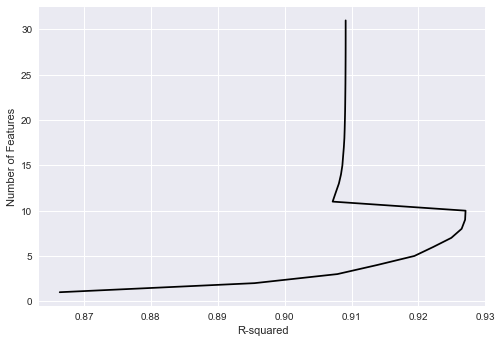

In [67]:
## graph the feature selection
x = rs
y = numofatt
plt.plot(x,y, 'k-')
plt.ylabel('Number of Features')
plt.xlabel('R-squared')

In [68]:
# remaking cluster 2 with the selected attributes
Y2 = df2['32']
X2 = df2.drop(['31', '32'], axis=1)
X2.columns = ['Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common','Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Book Value per Share', 'Beta']
X2 = X2.drop(['Price', 'Trailing P/E', 'Price/Sales', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Revenue Per Share', 'Enterprise Value', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'EBITDA', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Current Ratio', 'Book Value per Share', 'Beta'],axis=1)
Y2 = np.array(Y2)
X2 = np.array(X2)
# adding a column for x0
x0 = np.ones((len(X2),1))
X2 = np.hstack((x0, X2))
X2.shape

X2.shape

(1761, 11)

In [69]:
# ridge regression function, outputs MSE
def ridgeregression(xtrain, ytrain, xtest, ytest, a):
    xtrain = np.matrix(xtrain)
    ytrain = np.matrix(ytrain)
    xtest = np.matrix(xtest)
    ytest = np.matrix(ytest)
    n = len(xtrain.T*xtrain)
    I = np.identity(n)
    what = (np.linalg.inv(xtrain.T*xtrain + a*I))*(xtrain.T*ytrain.T)

    # calculating the yhat values 
    yhat = xtest*what
    
    # calculating MSE value
    mse = np.sum(np.square(ytest.T-yhat))/len(yhat)
    return(mse)

In [70]:
### CV - lambda on logarithmic scale
# grid search 1
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
for a in [10**a for a in range(-4,3)]: # user specified range
    for train_index, test_index in kf.split(X2):
        X_train, X_test = X2[train_index], X2[test_index]
        y_train, y_test = Y2[train_index], Y2[test_index]
        score = ridgeregression(X_train, y_train, X_test, y_test, a) # calling the ridge regression function
    print(score.mean(), a)
    scores.append(score.mean()) 
    
    
# finding the best lambda
alphas = []
for a in [10**a for a in range(-4,3)]: # range must match above
    alphas.append(a)
alphas = np.asarray(alphas)
# creating a table of the mse values and the lambda values 
best_alpha = np.column_stack((scores,alphas))
best_alpha
# find the minimum mse
m = np.argmin(best_alpha[:,0])
alpha = best_alpha[m,1]
print('The best lambda value is:', alpha)

3.27345391964e-05 0.0001
3.26976264319e-05 0.001
3.23677958859e-05 0.01
3.05153255431e-05 0.1
2.83326775546e-05 1
6.66395601518e-05 10
0.000302784302396 100
The best lambda value is: 1.0


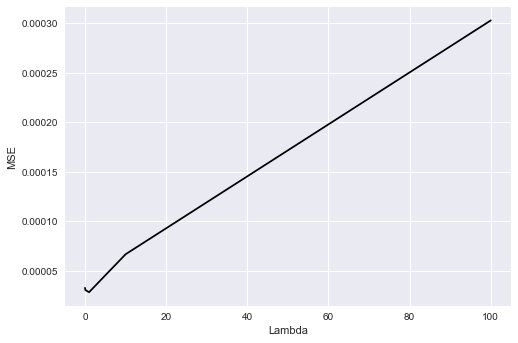

In [71]:
# plotting grid search 1
x = alphas
y = scores
plt.plot(x,y, 'k-')
plt.ylabel('MSE')
plt.xlabel('Lambda')

In [72]:
### CV - lambda from -10 to 10
# grid search 2
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
for a in range(-10,10): # user specified range
    for train_index, test_index in kf.split(X2):
        X_train, X_test = X2[train_index], X2[test_index]
        y_train, y_test = Y2[train_index], Y2[test_index]
        score = ridgeregression(X_train, y_train, X_test, y_test, a)
    print(score.mean(), a)
    scores.append(score.mean()) 
    
    
# finding the best lambda
alphas = []
for a in range(-10,10): # must match above
    alphas.append(a)
alphas = np.asarray(alphas)
# creating a table of the mse values and the lambda values 
best_alpha = np.column_stack((scores,alphas))
best_alpha
# find the minimum mse
m = np.argmin(best_alpha[:,0])
alpha = best_alpha[m,1]
print('The best lambda value is:', alpha)

0.000126971226837 -10
9.38136634785e-05 -9
6.96192828662e-05 -8
5.21777725764e-05 -7
3.09064715002e-05 -6
3.83055592461e-05 -5
3.05288266356e-05 -4
2.94387378894e-05 -3
4.74374694301e-05 -2
8.6640781966e-05 -1
3.27386934468e-05 0
2.83326775546e-05 1
3.06848756116e-05 2
3.40903241715e-05 3
3.8048005231e-05 4
4.23732323712e-05 5
4.69586244075e-05 6
5.17289742798e-05 7
5.66273974772e-05 8
6.1609386662e-05 9
The best lambda value is: 1.0


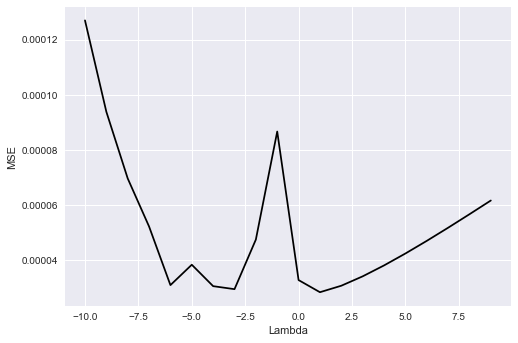

In [73]:
# plotting grid search 2
x = alphas
y = scores
plt.plot(x,y, 'k-')
plt.ylabel('MSE')
plt.xlabel('Lambda')

In [84]:
# optimal lambda - 1
## to find the weights 
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
for a in range(1,2):
    for train_index, test_index in kf.split(X2):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X2[train_index], X2[test_index]
        y_train, y_test = Y2[train_index], Y2[test_index]
        score = ridgereg(X_train, y_train, X_test, y_test, a)[0]
        scores.append(score[1])
            
    scores = np.array(scores)
print(scores.mean())

0.00218056565725


In [85]:
res = ridgereg(X_train, y_train, X_test, y_test, 1)
(res[1].T).shape

(1, 176)

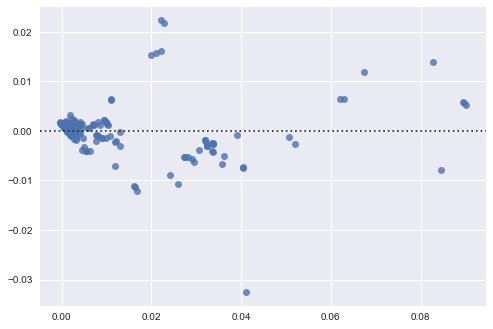

In [86]:
# residual plot
x = np.array(res[1])
y = y_test
import seaborn
seaborn.residplot(x, y)

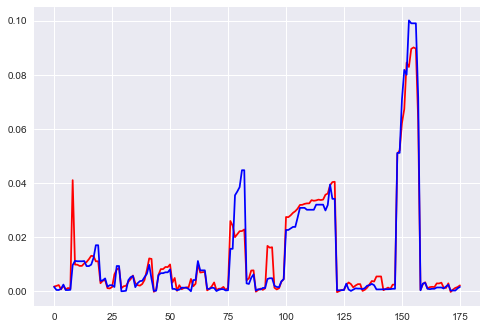

In [87]:
# plotting actual vs predicted values of y
x = np.array(res[1])
y = y_test

t = range(len(y_test))

plt.plot(t, x, 'r') # plotting t, a separately 
plt.plot(t, y, 'b') # plotting t, b separately 

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fb93b70>]], dtype=object)

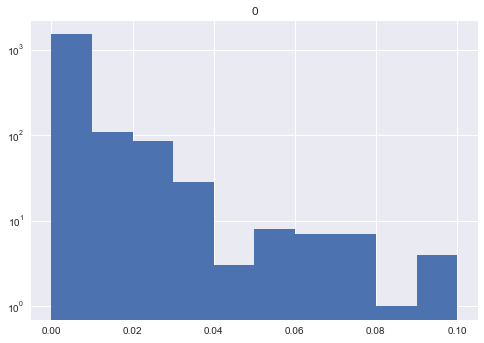

In [88]:
# histogram of Y
pd.DataFrame(Y2).hist(log=True)

In [161]:
## Lasso Regression

In [89]:
# remaking data frame 2 with all of the attributes
Y2 = df2['32']
X2 = df2.drop(['31', '32'], axis=1)
Y2.shape
Y2 = np.array(Y2)
X2 = np.array(X2)
# adding a column for x0
x0 = np.ones((len(X2),1))
X2 = np.hstack((x0, X2))
X2.shape

(1761, 31)

In [90]:
# splitting the dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, random_state = 42)

In [91]:
### Lasso Regression
# grid search 1
lasso = linear_model.LassoCV(alphas = [.0001,.001,.01,.1,1,10,100], cv=10) #setting cross-validation to 10
lasso.fit(X2_train, y2_train)
print(lasso.alpha_)
print(lasso.mse_path_)

0.0001
[[  1.05038963e-04   1.24804061e-04   2.28395787e-04   1.40188637e-04
    1.05708565e-04   1.00581944e-04   1.08586457e-04   8.48194329e-05
    3.78763432e-05   6.83738905e-05]
 [  1.05038963e-04   1.24804061e-04   2.28395787e-04   1.40188637e-04
    1.05708565e-04   1.00581944e-04   1.08586457e-04   8.48194329e-05
    3.78763432e-05   6.83738905e-05]
 [  1.05038963e-04   1.24804061e-04   2.28395787e-04   1.40188637e-04
    1.05708565e-04   1.00581944e-04   1.08586457e-04   8.48194329e-05
    3.78763432e-05   6.83738905e-05]
 [  1.05038963e-04   1.24804061e-04   2.28395787e-04   1.40188637e-04
    1.05708565e-04   1.00581944e-04   1.08586457e-04   8.48194329e-05
    3.78763432e-05   6.83738905e-05]
 [  1.05038963e-04   1.24804061e-04   2.28395787e-04   1.40188637e-04
    1.05708565e-04   1.00581944e-04   1.08586457e-04   8.48194329e-05
    3.78763432e-05   6.83738905e-05]
 [  1.05038963e-04   1.24804061e-04   2.28395787e-04   1.40188637e-04
    1.05708565e-04   1.00581944e-04   

In [92]:
### Lasso Regression
# grid search 2
lasso = linear_model.LassoCV(alphas = [.0001,.0002,.0003], cv=10) #setting cross-validation to 10
lasso.fit(X2_train, y2_train)
print(lasso.alpha_)
print(lasso.mse_path_)

0.0001
[[  3.13789866e-05   2.98737032e-05   7.33146374e-05   2.39730984e-05
    4.05830164e-05   1.92992989e-05   2.14913467e-05   1.25307897e-05
    1.11404650e-05   1.51589704e-05]
 [  2.46019348e-05   2.07930013e-05   5.10404397e-05   1.44554683e-05
    3.56946609e-05   1.26171399e-05   1.55093102e-05   6.68571870e-06
    8.73995000e-06   1.19555901e-05]
 [  1.92846332e-05   1.42825140e-05   2.78521836e-05   8.16968045e-06
    3.29426985e-05   8.03246205e-06   1.66162980e-05   3.74779206e-06
    6.59146063e-06   1.06614471e-05]]


In [93]:
# finding the MSE value
lst = [  1.05038963e-04,   1.24804061e-04,   2.28395787e-04,   1.40188637e-04,
    1.05708565e-04,   1.00581944e-04,   1.08586457e-04,   8.48194329e-05,
    3.78763432e-05,   6.83738905e-05]
np.average(lst)

0.00011043740805999997

In [94]:
lasso0001 = Lasso(alpha=0.0001, max_iter=100000).fit(X2_train, y2_train)
print(np.sum(lasso0001.coef_ != 0))
print(lasso0001.coef_ != 0)
print(lasso0001.coef_ )

4
[False False  True False False False False False False False False False
 False False  True False False False False  True False  True False False
 False False False False False False False]
[ 0.          0.          0.00085809 -0.          0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.          0.
  0.02802592 -0.         -0.         -0.         -0.          0.04806115
  0.          0.02371876  0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.        ]


## ---------------------------

In [170]:
# feature selection for the third cluster
corr = X3.corr()
corr

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,30
0,1.000000,-0.178991,0.028813,-0.048693,0.013271,0.072336,-0.004153,0.016322,0.012884,0.014245,...,-0.025448,-0.027859,-0.024026,0.046041,0.004899,-0.020959,-0.003344,0.033700,-0.027016,0.019319
1,-0.178991,1.000000,0.030025,0.145019,-0.081654,-0.072269,-0.067020,0.085288,0.081275,-0.003658,...,0.121325,0.216138,0.000536,0.023912,0.032034,-0.037897,0.070096,-0.027542,0.142676,0.068326
2,0.028813,0.030025,1.000000,-0.017300,-0.010762,0.000278,-0.010970,-0.006770,-0.016465,-0.008450,...,-0.014110,-0.069384,-0.002407,-0.015333,0.010967,-0.006519,-0.013211,-0.012734,-0.064949,-0.003463
3,-0.048693,0.145019,-0.017300,1.000000,-0.025647,-0.030196,0.086010,-0.021746,-0.000549,-0.023844,...,-0.016645,-0.025024,-0.004715,-0.016942,-0.000331,-0.004106,0.032912,-0.013805,-0.038842,-0.008199
4,0.013271,-0.081654,-0.010762,-0.025647,1.000000,0.465831,0.055183,-0.094620,-0.078750,-0.106792,...,-0.113750,-0.259809,0.034317,0.338640,-0.043486,-0.010673,-0.041383,0.155033,-0.125225,0.039451
5,0.072336,-0.072269,0.000278,-0.030196,0.465831,1.000000,0.153825,0.464412,0.448429,0.167466,...,-0.071562,-0.236465,0.032906,0.535188,0.021293,-0.022735,-0.055825,0.342479,-0.202077,0.033874
6,-0.004153,-0.067020,-0.010970,0.086010,0.055183,0.153825,1.000000,0.062659,0.103578,0.262331,...,-0.040262,-0.053640,-0.012663,0.060930,-0.032216,-0.013704,-0.034671,0.005265,-0.213513,-0.004890
7,0.016322,0.085288,-0.006770,-0.021746,-0.094620,0.464412,0.062659,1.000000,0.759525,0.268985,...,0.104784,0.212126,0.039918,0.176257,0.086120,-0.019986,-0.007068,0.129200,-0.037167,0.029820
8,0.012884,0.081275,-0.016465,-0.000549,-0.078750,0.448429,0.103578,0.759525,1.000000,0.351423,...,0.091217,0.126967,0.015146,0.155936,0.085212,-0.006640,-0.007892,0.102335,0.021425,0.024187
9,0.014245,-0.003658,-0.008450,-0.023844,-0.106792,0.167466,0.262331,0.268985,0.351423,1.000000,...,0.043788,0.082310,-0.017593,0.173059,-0.038483,-0.032554,-0.132388,0.118398,-0.272063,0.017614


In [95]:
# adding a column for x0
x0 = np.ones((len(X3),1))
X3 = np.hstack((x0, X3))
X3.shape

(2552, 31)

In [96]:
# backward feature selection
import statsmodels.formula.api as sm
numVars = len(X3[0]) 
rs = []
numofatt = []
# names of features
names = ['x0','Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common','Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Book Value per Share', 'Beta']

for i in range(0, numVars):
    regressor_OLS = sm.OLS(Y3, X3).fit()
    regressor_OLS.summary(xname = names)
    maxp = max(regressor_OLS.pvalues) # find max p-value
    #print(maxp)
    rs.append(regressor_OLS.rsquared) # make list of R2 values
    numofatt.append(len(X3[0])) # make list of num of attributes
    for j in range(0, numVars - i):
        if (regressor_OLS.pvalues[j] == maxp):
            names.remove(names[j])
            X3 = np.delete(X3, j, 1)
            print(names)

print(rs)
print(numofatt)

['x0', 'Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common', 'Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Beta']
['x0', 'Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'Net Income Avl to Common', 'Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Beta']
['x0', 'Month', 'Year', 'Price', 'DE Ratio

In [97]:
# finding the optimal number of attributes based on the maximum R-squared value
best_equation = np.column_stack((rs,numofatt))
print(best_equation)
# find the maximum r-squared
m = np.argmax(best_equation[:,0])
num = best_equation[m,1]
print('The ideal number of features is:', num)

[[  0.9053666   31.        ]
 [  0.90536659  30.        ]
 [  0.90536558  29.        ]
 [  0.90536409  28.        ]
 [  0.90536229  27.        ]
 [  0.9053604   26.        ]
 [  0.9053571   25.        ]
 [  0.90535268  24.        ]
 [  0.9053432   23.        ]
 [  0.90533197  22.        ]
 [  0.90532133  21.        ]
 [  0.90531784  20.        ]
 [  0.90530479  19.        ]
 [  0.90528675  18.        ]
 [  0.9052656   17.        ]
 [  0.90523433  16.        ]
 [  0.90518255  15.        ]
 [  0.90511706  14.        ]
 [  0.90502413  13.        ]
 [  0.90487195  12.        ]
 [  0.90471591  11.        ]
 [  0.90446642  10.        ]
 [  0.90390784   9.        ]
 [  0.90343106   8.        ]
 [  0.90315773   7.        ]
 [  0.90283992   6.        ]
 [  0.90211376   5.        ]
 [  0.9239553    4.        ]
 [  0.92324006   3.        ]
 [  0.91380812   2.        ]
 [  0.88865074   1.        ]]
The ideal number of features is: 4.0


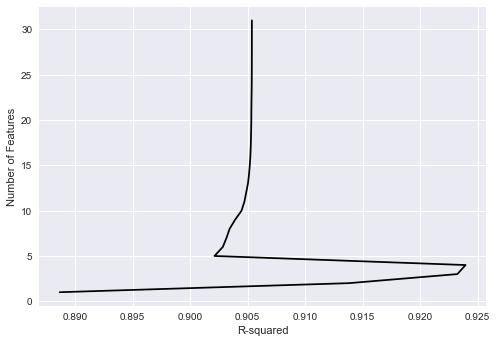

In [98]:
## graph the feature selection
x = rs
y = numofatt
plt.plot(x,y, 'k-')
plt.ylabel('Number of Features')
plt.xlabel('R-squared')

In [99]:
#['Enterprise Value', 'Gross Profit', 'Net Income Avl to Common', 'Total Debt']
# remaking cluster 3 with four attributes
Y3 = df3['32']
X3 = df3.drop(['31', '32'], axis=1)
X3.columns = ['Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'Enterprise Value', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'Gross Profit', 'EBITDA', 'Net Income Avl to Common','Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Total Debt', 'Current Ratio', 'Book Value per Share', 'Beta']
X3 = X3.drop(['Month', 'Year', 'Price', 'DE Ratio', 'Trailing P/E', 'Price/Sales', 'Price/Book', 'Profit Margin', 'Operating Margin', 'Return on Assets', 'Return on Equity', 'Revenue Per Share', 'Market Cap', 'PEG Ratio', 'Enterprise Value/Revenue', 'Enterprise Value/EBITDA', 'Revenue', 'EBITDA','Diluted EPS', 'Earnings Growth', 'Revenue Growth', 'Total Cash', 'Total Cash Per Share', 'Current Ratio', 'Book Value per Share', 'Beta'],axis=1)
Y3 = np.array(Y3)
X3 = np.array(X3)
# adding a column for x0
x0 = np.ones((len(X3),1))
X3 = np.hstack((x0, X3))
X3.shape

X3.shape

(2552, 5)

In [100]:
# ridge regression function, returns the MSE
def ridgeregression(xtrain, ytrain, xtest, ytest, a):
    xtrain = np.matrix(xtrain)
    ytrain = np.matrix(ytrain)
    xtest = np.matrix(xtest)
    ytest = np.matrix(ytest)
    n = len(xtrain.T*xtrain)
    I = np.identity(n)
    what = (np.linalg.inv(xtrain.T*xtrain + a*I))*(xtrain.T*ytrain.T)
    
    # calculating the yhat values 
    yhat = xtest*what
    
    # calculating MSE value
    mse = np.sum(np.square(ytest.T-yhat))/len(yhat)
    return(mse)

In [101]:
### CV - alpha on logarithmic scale
# grid search 1
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
for a in [10**a for a in range(-4,3)]: # user specified range
    for train_index, test_index in kf.split(X3):
        X_train, X_test = X3[train_index], X3[test_index]
        y_train, y_test = Y3[train_index], Y3[test_index]
        score = ridgeregression(X_train, y_train, X_test, y_test, a) # calling the ridge regression function
    print(score.mean(), a)
    scores.append(score.mean()) 
    
    
# finding the best lambda
alphas = []
for a in [10**a for a in range(-4,3)]: # must match above
    alphas.append(a)
alphas = np.asarray(alphas)
# creating a table of the mse values and the lambda values 
best_alpha = np.column_stack((scores,alphas))
best_alpha
# find the minimum mse
m = np.argmin(best_alpha[:,0])
alpha = best_alpha[m,1]
print('The best lambda value is:', alpha)

1.91694838074e-05 0.0001
1.91683542309e-05 0.001
1.91576607984e-05 0.01
1.91013689493e-05 0.1
2.05510456967e-05 1
4.93509142474e-05 10
0.000157372987982 100
The best lambda value is: 0.1


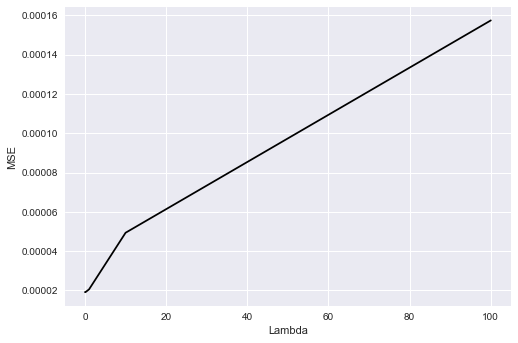

In [102]:
# plotting grid search 1
x = alphas
y = scores
plt.plot(x,y, 'k-')
plt.ylabel('MSE')
plt.xlabel('Lambda')

In [103]:
### CV - lambda from -1 to .9
# grid search 2
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
l = 10**(-1)
for a in [l*a for a in range(-10,10)]: # user specified range
    for train_index, test_index in kf.split(X3):
        X_train, X_test = X3[train_index], X3[test_index]
        y_train, y_test = Y3[train_index], Y3[test_index]
        score = ridgeregression(X_train, y_train, X_test, y_test, a) # calling the ridge regression function
    print(score.mean(), a)
    scores.append(score.mean()) 
    
    
# finding the best lambda
alphas = []
l = 10**(-1)
for a in [l*a for a in range(-10,10)]: # must match above
    alphas.append(a)
alphas = np.asarray(alphas)
# creating a table of the mse values and the lambda values 
best_alpha = np.column_stack((scores,alphas))
best_alpha
# find the minimum mse
m = np.argmin(best_alpha[:,0])
alpha = best_alpha[m,1]
print('The best lambda value is:', alpha)

1.97042372661e-05 -1.0
1.91852546614e-05 -0.9
1.89603686306e-05 -0.8
1.93109042043e-05 -0.7000000000000001
2.36612789348e-05 -0.6000000000000001
0.00829430373626 -0.5
2.76335792789e-05 -0.4
2.12795473251e-05 -0.30000000000000004
1.98954153306e-05 -0.2
1.93824168482e-05 -0.1
1.91696100051e-05 0.0
1.91013689493e-05 0.1
1.91186274656e-05 0.2
1.91936953599e-05 0.30000000000000004
1.9311455739e-05 0.4
1.9462637886e-05 0.5
1.96410185963e-05 0.6000000000000001
1.9842117767e-05 0.7000000000000001
2.00625329511e-05 0.8
2.02995734436e-05 0.9
The best lambda value is: -0.8


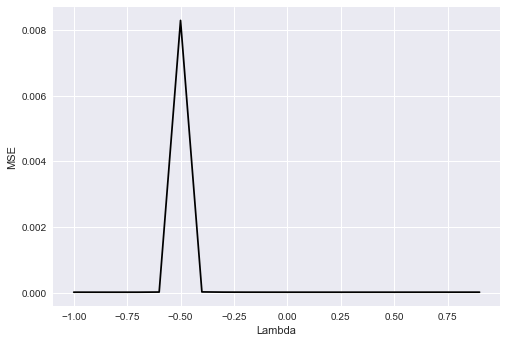

In [104]:
# plotting grid search 2
x = alphas
y = scores
plt.plot(x,y, 'k-')
plt.ylabel('MSE')
plt.xlabel('Lambda')

In [121]:
# optimal alpha 
## to find the weights (need to print those)
from sklearn.model_selection import KFold
kf = KFold(10,shuffle=False,random_state=42)
kf
scores = []
l = 10**(-1)
for a in [l*a for a in range(-8,-7)]:
    for train_index, test_index in kf.split(X3):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X3[train_index], X3[test_index]
        y_train, y_test = Y3[train_index], Y3[test_index]
        score = ridgereg(X_train, y_train, X_test, y_test, a)[0]
        scores.append(score[4])
            
    scores = np.array(scores)
print(scores.mean())

-0.032966398219


In [122]:
res = ridgereg(X_train, y_train, X_test, y_test, 1)
(res[1].T).shape

(1, 255)

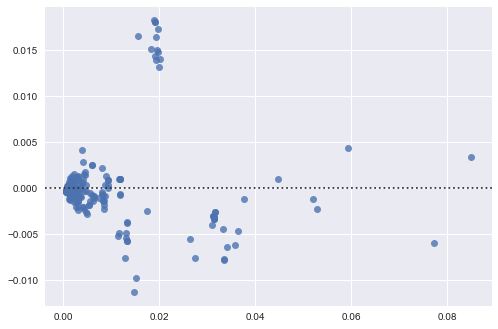

In [123]:
# plotting the residuals
x = np.array(res[1])
y = y_test
import seaborn
seaborn.residplot(x, y)

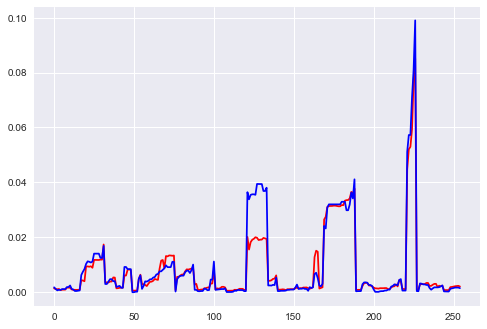

In [124]:
# plotting actual vs predicted y values
x = np.array(res[1])
y = y_test

t = range(len(y_test))

plt.plot(t, x, 'r') # plotting t, a separately 
plt.plot(t, y, 'b') # plotting t, b separately 

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f978630>]], dtype=object)

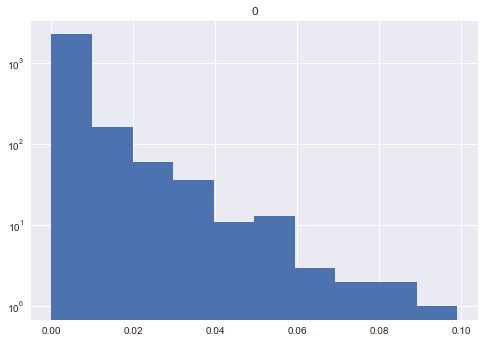

In [125]:
# histogram of Y
pd.DataFrame(Y3).hist(log=True)

In [126]:
# Lasso Regression

In [127]:
# remaking cluster 3 with all of the attributes
Y3 = df3['32']
X3 = df3.drop(['31', '32'], axis=1)
Y3.shape
Y3 = np.array(Y3)
X3 = np.array(X3)
# adding a column for x0
x0 = np.ones((len(X3),1))
X3 = np.hstack((x0, X3))
X3.shape

(2552, 31)

In [128]:
# splitting the dataset
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, random_state = 42)

In [129]:
### Lasso Regression
# grid search 1
lasso = linear_model.LassoCV(alphas = [.0001,.001,.01,.1,1,10,100], cv=10) #setting cross-validation to 10
lasso.fit(X3_train, y3_train)
print(lasso.alpha_)
print(lasso.mse_path_)

0.0001
[[  9.66991014e-05   7.47504331e-05   1.10595772e-04   3.41914284e-05
    3.82420294e-05   3.88768483e-05   4.03423471e-05   8.71826223e-05
    8.60362022e-05   7.20399312e-05]
 [  9.66991014e-05   7.47504331e-05   1.10595772e-04   3.41914284e-05
    3.82420294e-05   3.88768483e-05   4.03423471e-05   8.71826223e-05
    8.60362022e-05   7.20399312e-05]
 [  9.66991014e-05   7.47504331e-05   1.10595772e-04   3.41914284e-05
    3.82420294e-05   3.88768483e-05   4.03423471e-05   8.71826223e-05
    8.60362022e-05   7.20399312e-05]
 [  9.66991014e-05   7.47504331e-05   1.10595772e-04   3.41914284e-05
    3.82420294e-05   3.88768483e-05   4.03423471e-05   8.71826223e-05
    8.60362022e-05   7.20399312e-05]
 [  9.66991014e-05   7.47504331e-05   1.10595772e-04   3.41914284e-05
    3.82420294e-05   3.88768483e-05   4.03423471e-05   8.71826223e-05
    8.60362022e-05   7.20399312e-05]
 [  9.66991014e-05   7.47504331e-05   1.10595772e-04   3.41914284e-05
    3.82420294e-05   3.88768483e-05   

In [130]:
### Lasso Regression
# grid search 2
lasso = linear_model.LassoCV(alphas = [.0001,.0002,.0003], cv=10) #setting cross-validation to 10
lasso.fit(X3_train, y3_train)
print(lasso.alpha_)
print(lasso.mse_path_)

0.0001
[[  3.78763802e-05   2.51337903e-05   4.21321841e-05   1.33749033e-05
    1.04219953e-05   1.13835790e-05   1.39122322e-05   3.64656119e-05
    3.15475044e-05   2.18810904e-05]
 [  2.62318398e-05   1.64902781e-05   2.68568770e-05   9.41281116e-06
    5.91058406e-06   7.01092311e-06   1.02081723e-05   2.50406063e-05
    2.15131661e-05   1.18464411e-05]
 [  1.68515617e-05   1.12194662e-05   1.68583175e-05   6.53748450e-06
    3.40096593e-06   4.44359475e-06   8.79248339e-06   1.71419515e-05
    1.54732975e-05   5.81538318e-06]]


In [131]:
# calculating the MSE
lst = [  3.78763802e-05,   2.51337903e-05,   4.21321841e-05,   1.33749033e-05,
    1.04219953e-05,   1.13835790e-05,   1.39122322e-05,   3.64656119e-05,
    3.15475044e-05,   2.18810904e-05]
np.average(lst)

2.441292711e-05

In [132]:
print(np.sum(lasso.coef_ != 0))
print(lasso.coef_ != 0)
print(lasso.coef_ )

4
[False False False False False False False False False False False False
 False  True  True False False False False  True False  True False False
 False False False False False False False]
[ 0.         -0.          0.         -0.          0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
  0.01531503  0.01942902  0.         -0.         -0.         -0.
  0.04254071 -0.          0.00497351  0.         -0.         -0.          0.
 -0.          0.         -0.          0.          0.        ]
